# Student Stress

### Import

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


### Download the database

In [33]:
url = "https://raw.githubusercontent.com/MiliCod/Insights-Unveiled-A-Data-Driven-Exploration-of-Student-Stress-Factors/main/StressLevelDataset.csv"
data = pd.read_csv(url)

### Correlation matrice


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

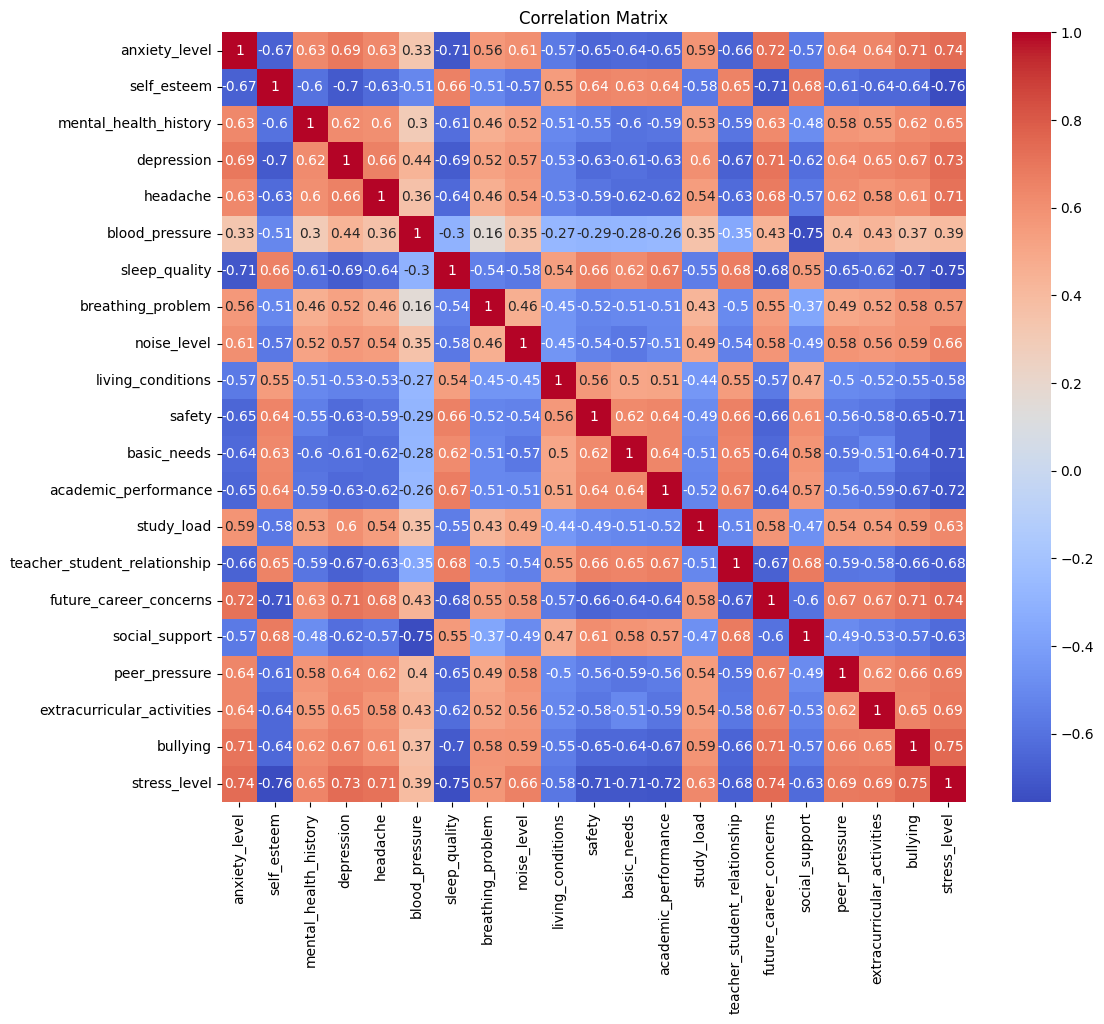

In [34]:
# Display information about the DataFrame
data.info()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

The graph generated from the correlation matrix provides an overall perspective on the linear relationships between the variables in the dataset, except "stress_level". The shaded colors, ranging from dark blue to dark red, indicate the strengths and directions of the correlations. Overall, most variables show significant correlations, either negative (dark blue) or positive (dark red), suggesting consistency in linear trends between these factors.

A notable point concerns the variable "blood_pressure" which displays a correlation of 0.39 with other variables. This value, although positive, remains below 0.5, indicating a moderate correlation. This observation suggests that blood pressure is associated with other variables, but the strength of this relationship is not as strong as that observed between other pairs of variables. If blood pressure is linked to student stress, this moderate correlation suggests a potential contribution to stress levels, while highlighting that other factors may also play a significant role.


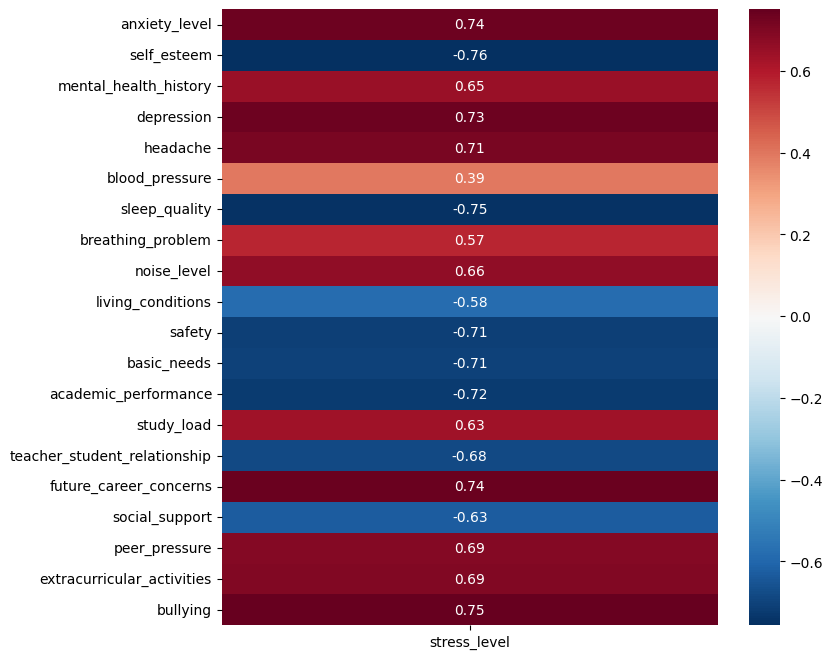

In [35]:
correl = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correl.iloc[:-1,-1:], annot = True, cmap = "RdBu_r");

### PCA

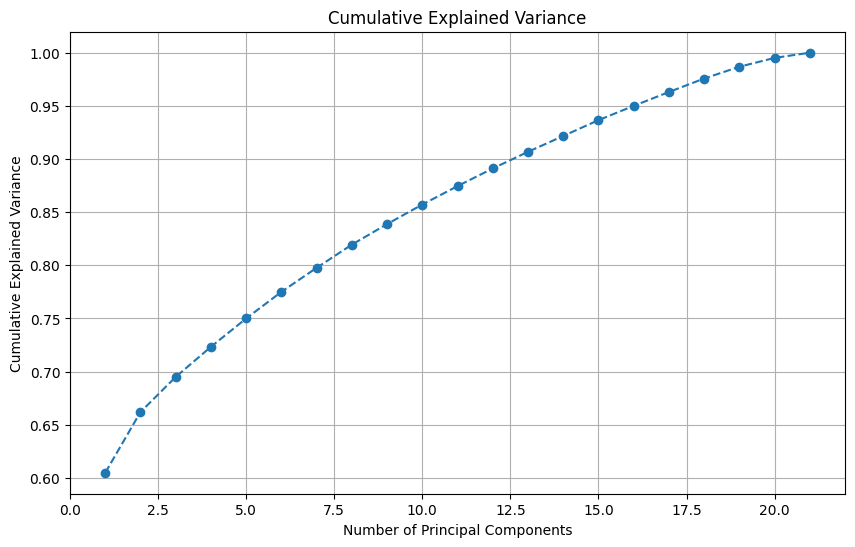

In [36]:
# Select relevant columns for PCA analysis

columns_for_pca = data.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = data[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Apply Principal Component Analysis (PCA)
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Classification model:




Using a Classifier model, our program evaluates the relative importance of different characteristics in the psychological, physiological, environmental, academic, and social categories. All the results are compared by the “stress level”. The results of this analysis will offer valuable insights into potential levers of action to alleviate student stress.

In [37]:
# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = data[features]
    y = data['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_


    # Store feature importances in the dictionary

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

Factor: Psychological
- Feature: anxiety_level, Importance: 0.23220253232459012
- Feature: self_esteem, Importance: 0.5507996876590516
- Feature: mental_health_history, Importance: 0.020872768560401347
- Feature: depression, Importance: 0.19612501145595693

Factor: Physiological
- Feature: headache, Importance: 0.3746781780162841
- Feature: blood_pressure, Importance: 0.05161933370623621
- Feature: sleep_quality, Importance: 0.5026551880927319
- Feature: breathing_problem, Importance: 0.07104730018474788

Factor: Environmental
- Feature: noise_level, Importance: 0.15503782698752047
- Feature: living_conditions, Importance: 0.12305884904463797
- Feature: safety, Importance: 0.31232455615091176
- Feature: basic_needs, Importance: 0.40957876781692987

Factor: Academic
- Feature: academic_performance, Importance: 0.37168269153746974
- Feature: study_load, Importance: 0.10520570471286386
- Feature: teacher_student_relationship, Importance: 0.26158597029849806
- Feature: future_career_concer

In [38]:
# Remove features with importance below 0.1
selected_features = {}

for factor, importance_dict in feature_importance.items():
    selected_features[factor] = [feature for feature, importance_value in importance_dict.items() if importance_value >= 0.1]

# Create a list of all selected features
all_selected_features = set(feature for features_list in selected_features.values() for feature in features_list)

# Remove unwanted features from the original dataset
filtered_data = data[all_selected_features]



<ipython-input-38-232e2a0d9dc6>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_data = data[all_selected_features]


In [39]:
# Create dictionaries of selected features by category
selected_features_by_category = {category: [] for category in factors}

for factor, features_list in selected_features.items():
    for category, category_features in categories.items():
        selected_features_by_category[category].extend([feature for feature in features_list if feature in category_features])

# Display feature names by category
for category, category_features in selected_features_by_category.items():
    print(f"\n{category} Category:")
    print(", ".join(category_features))



Psychological Category:
anxiety_level, self_esteem, depression

Physiological Category:
headache, sleep_quality

Environmental Category:
noise_level, living_conditions, safety, basic_needs

Academic Category:
academic_performance, study_load, teacher_student_relationship, future_career_concerns

Social Category:
peer_pressure, extracurricular_activities, bullying
